# Part D: Two-Qubit System Analysis

### Introduction

In this part, we extend our analysis to a two-qubit system with a it's corresponding Hamiltonian. Defining the Hamiltonian Same as in part b consisting of a non-interacting part $H_0$ and an interaction part $H_I$, with the total Hamiltonian given by $H = H_0 + \lambda H_I$ where $\lambda$ is the interaction strength.

### Details

To construct a two level system, we can start by constructing two subsystems $A$ and $B$ with each subsystem having the computational basis states $|0\rangle$ and $|1\rangle$ as discussed in part A. The total Hilbert space of the two-qubit system is given by the tensor product of the two subsystems, i.e., $\mathcal{H} = \mathcal{H}_A \otimes \mathcal{H}_B$.

the two-qubit computational basis are thus constrcuted as:
$$
|00\rangle = |0\rangle_A \otimes |0\rangle_B = 
\begin{bmatrix}
1 \\ 0 \\ 0 \\ 0
\end{bmatrix}, \quad |01\rangle = |0\rangle_A \otimes |1\rangle_B =
\begin{bmatrix}
0 \\ 1 \\ 0 \\ 0
\end{bmatrix}, \quad |10\rangle = |1\rangle_A \otimes |0\rangle_B =
\begin{bmatrix}
0 \\ 0 \\ 1 \\ 0
\end{bmatrix}, \quad |11\rangle = |1\rangle_A \otimes |1\rangle_B =
\begin{bmatrix}
0 \\ 0 \\ 0 \\ 1
\end{bmatrix}
$$


Next the above states is used to define the eigen states of the non-interacting Hamiltonian $H_0$ as:
$$
H_0\ket{00} = \epsilon_{00}\ket{00}, \quad H_0\ket{01} = \epsilon_{01}\ket{01}, \quad H_0\ket{10} = \epsilon_{10}\ket{10}, \quad H_0\ket{11} = \epsilon_{11}\ket{11}
$$
where $\epsilon_{00}, \epsilon_{01}, \epsilon_{10}, \epsilon_{11}$ are the corresponding eigenvalues of the non-interacting Hamiltonian $H_0$.

The interaction Hamiltonian $H_I$ is given by the tensor product of two $\sigma_x$ and $\sigma_z$ matrices:

$$
H_I = H_x\sigma_x \otimes \sigma_x + H_z\sigma_z \otimes \sigma_z
$$

where $H_x$ and $H_z$ are the interaction strengths for the $\sigma_x$ and $\sigma_z$ interactions, respectively.

The final Hamiltonian is given by:
$$
\boldsymbol{H}=\begin{bmatrix} \epsilon_{00}+H_z & 0 & 0 & H_x \\
                       0  & \epsilon_{10}-H_z & H_x & 0 \\
		       0 & H_x & \epsilon_{01}-H_z & 0 \\
		       H_x & 0 & 0 & \epsilon_{11} +H_z \end{bmatrix}.
$$

In the case of the two-qubit system, $4 \times 4$ Hamiltonian. The Pauli decomposition of the Hamiltonian is given by:
$$
H= \sum_{p,q\in\{I,X,Y,Z\} }c_{pq}\sigma_p\otimes\sigma_q
$$

where each coefficient $c_{pq}$ is given by:
$$
c_{pq} = \frac{1}{4}\text{Tr}(H\sigma_p\otimes\sigma_q )$$


We will now examine how the eigenvalues of the above Hamiltonian change with $\lambda$ and study the entanglement properties using the von Neumann entropy.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from quantum_computing.p1.hamiltonian.hamiltonian import TwoQubitHamiltonian

# Set plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [7, 3]
plt.rcParams['font.size'] = 12

## System Parameters

We set up the two-qubit system with the parameters given in the problem:

In [2]:
# Interaction parameters
H_x = 2.0
H_z = 3.0

# Non-interacting energies [ε_00, ε_01, ε_10, ε_11]
energies_noninteracting = [0.0, 2.5, 6.5, 7.5]

hamiltonian = TwoQubitHamiltonian(energies_noninteracting, H_x, H_z)
lambda_values = np.linspace(0, 1, 100)

## Eigenvalues as a Function of λ

First, let's compute the eigenvalues of the system as we vary the interaction strength λ from 0 to 1:

<>:10: SyntaxWarning: invalid escape sequence '\l'
<>:10: SyntaxWarning: invalid escape sequence '\l'
C:\Users\javid.rezai\AppData\Local\Temp\ipykernel_4688\3323831578.py:10: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('Interaction Strength $\lambda$')


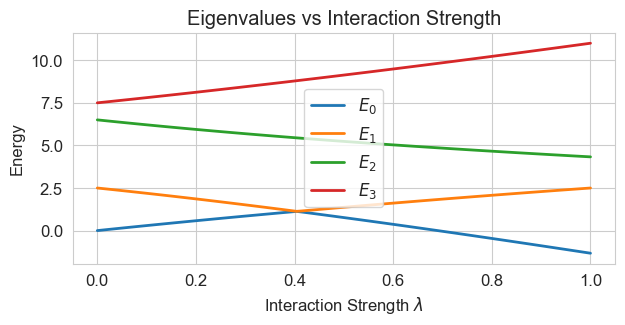

Eigenvalues at λ=0: [0.  2.5 6.5 7.5]
Eigenvalues at λ=1: [-1.32842712  2.5         4.32842712 11.        ]


In [3]:
eigenvalues_list, eigenvectors_list = hamiltonian.eigenvalues_vs_lambda(lambda_values)

eigenvalues_array = np.array(eigenvalues_list)

plt.figure()
for i in range(4):  # 4 eigenvalues for 2-qubit system
    plt.plot(lambda_values, eigenvalues_array[:, i], linewidth=2, 
             label=f'$E_{i}$')

plt.xlabel('Interaction Strength $\lambda$')
plt.ylabel('Energy')
plt.title('Eigenvalues vs Interaction Strength')
plt.legend()
plt.grid(True)
plt.show()

print(f"Eigenvalues at λ=0: {eigenvalues_list[0]}")
print(f"Eigenvalues at λ=1: {eigenvalues_list[-1]}")

We observe that the energies of the system with zero interaction are given by the eigenvalues of the non-interacting Hamiltonian $H_0$. As the $\lambda$ s increases we see that the gap between $E_2$ and $E_3$ increase with $E_2$ decrease and $E_3$ increase linearly until $\lambda = 1$. 
For the energies $E_0$ and $E_1$ the behavior is more complex. The energy $E_0$ increases and $E_1$ decreases until $\lambda = 0.4$ where the energies becomes degenerate and then $E_0$ decreases and $E_1$ increases until $\lambda = 1$. For the interaction strength $\lambda$ where the energies are degenerate this point is called level crossing.
The level crossing indicate that the system is in a critical point where the system undergoes some system change. 

## Eigenvector Analysis

We will look at how the ground state composition changes with λ:

<>:10: SyntaxWarning: invalid escape sequence '\l'
<>:10: SyntaxWarning: invalid escape sequence '\l'
C:\Users\javid.rezai\AppData\Local\Temp\ipykernel_4688\924924169.py:10: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('Interaction Strength $\lambda$')


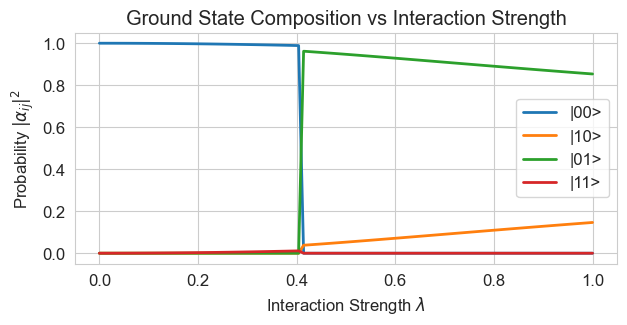

In [4]:
# Extract coefficients of the ground state
ground_state_coeffs = np.array([eigenvectors_list[i][:, 0] for i in range(len(lambda_values))])

# Plot probability amplitudes |α_ij|^2 vs lambda
plt.figure()
labels = ['|00>', '|10>', '|01>', '|11>']
for i in range(4):
    plt.plot(lambda_values, np.abs(ground_state_coeffs[:, i])**2, linewidth=2, label=labels[i])

plt.xlabel('Interaction Strength $\lambda$')
plt.ylabel('Probability $|\\alpha_{ij}|^2$')
plt.title('Ground State Composition vs Interaction Strength')
plt.legend()
plt.grid(True)
plt.show()

Aanlyzing the probability of the ground composition we see that the ground state almost completely consists of the state $|00\rangle$ for $\lambda \in [0, 0.4]$ and then the state $|01\rangle$ for $\lambda \in [0.4, 1]$ with some contribution from the state $|10\rangle$.
The state $|11\rangle$ is not present in the ground state composition.
The ground state composition indicates that the system undergoes a phase transition at $\lambda = 0.4$ where the system changes from a pure state to a mixed state.

## Entanglement Analysis

The four Eigen states of the our Hamiltonian matrix can in turn be used to define the density matrix $\rho$. As an example, the density matrix for the first eigenstate is given by:
$$
\rho_0 = \alpha_{00} \ket{00}\bra{00} + \alpha_{01} \ket{01}\bra{01} + \alpha_{10} \ket{10}\bra{10} + \alpha_{11} \ket{11}\bra{11}
$$
where the coefficients $\alpha_{ij}$ are the eigenvector coefficients resulting from solving the eigenvalue problem for the Hamiltonian matrix.

We can also define the density matrix for each subsystem $A$ and $B$ as:
$$
\rho_A = \text{Tr}_B(\rho_0) = \bra{0}\rho_0\ket{0}_B + \bra{1}\rho_0\ket{1}_B = \begin{bmatrix}
\alpha_{00} + \alpha_{01} & 0 \\
0 & \alpha_{10} + \alpha_{11}
\end{bmatrix}
$$

and
$$
\rho_B = \text{Tr}_A(\rho_0) = \bra{0}\rho_0\ket{0}_A + \bra{1}\rho_0\ket{1}_A = \begin{bmatrix}
\alpha_{00} + \alpha_{10} & 0 \\
0 & \alpha_{01} + \alpha_{11}
\end{bmatrix}
$$

The Density matrix of these subsystems can be used to compute the von Neumann entropy, which is a measure of the entanglement. A pure state has zero entropy, while a mixed state has non-zero entropy. The von Neumann entropy is given by:
$$
S(A,B) = -\text{Tr}(\rho_{A,B} \log_2 \rho_{A,B})
$$
where $\lambda_i$ are the eigenvalues of the density matrix $\rho$.


Now, let's compute the von Neumann entropy for the ground state as a function of the interaction strength. This will measure the entanglement between the two qubits:

<>:7: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\l'
C:\Users\javid.rezai\AppData\Local\Temp\ipykernel_4688\3057564327.py:7: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('Interaction Strength $\lambda$')


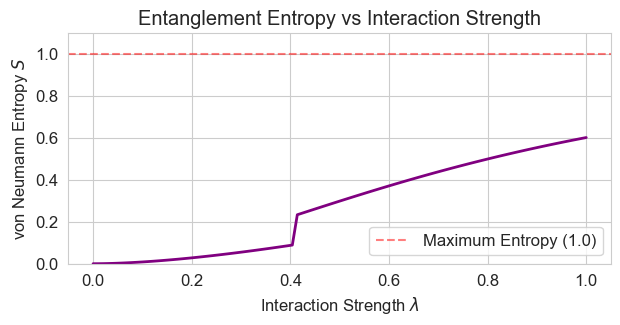

In [5]:
# Compute entropy for the ground state
entropy_values = hamiltonian.entropy_vs_lambda(lambda_values, state_index=0, subsystem='A')

plt.figure()
plt.plot(lambda_values, entropy_values, linewidth=2, color='purple')
plt.axhline(y=1.0, color='r', linestyle='--', alpha=0.5, label='Maximum Entropy (1.0)')
plt.xlabel('Interaction Strength $\lambda$')
plt.ylabel('von Neumann Entropy $S$')
plt.title('Entanglement Entropy vs Interaction Strength')
plt.ylim(0, 1.1)
plt.grid(True)
plt.legend()
plt.show()

Looking at the von Neumann entropy of the ground state for the subsystem $A$ we see that the entropy is zero for $\lambda = 0$ we see a slow increase of the entropy until $\lambda = 0.4$ where there appears a clear positive jump in the entropy indicating that the system undergoes a clear entanglement. 

## Comparison of Entanglement for Different Eigenstates

Let's compare the entanglement entropy for all four eigenstates:

<>:8: SyntaxWarning: invalid escape sequence '\l'
<>:8: SyntaxWarning: invalid escape sequence '\l'
C:\Users\javid.rezai\AppData\Local\Temp\ipykernel_4688\367477989.py:8: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('Interaction Strength $\lambda$')


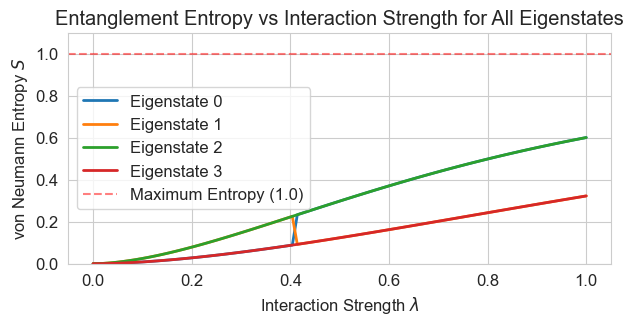

In [6]:
plt.figure()

for state_idx in range(4):
    entropy_values = hamiltonian.entropy_vs_lambda(lambda_values, state_index=state_idx)
    plt.plot(lambda_values, entropy_values, linewidth=2, label=f'Eigenstate {state_idx}')

plt.axhline(y=1.0, color='r', linestyle='--', alpha=0.5, label='Maximum Entropy (1.0)')
plt.xlabel('Interaction Strength $\lambda$')
plt.ylabel('von Neumann Entropy $S$')
plt.title('Entanglement Entropy vs Interaction Strength for All Eigenstates')
plt.ylim(0, 1.1)
plt.grid(True)
plt.legend()
plt.show()

In the figure above we see that all the four states being pure states at $\lambda = 0$ have entropy zero. As we increase the interaction strength $\lambda$ we see that the entropy of each state slowly increases until $\lambda = 0.4$ where the entropy of the state $|00\rangle$ and $|01\rangle$ have a clear jump in the entropy indicating that the system undergoes a clear entanglement or a phase transition. the other two states do contribute to the mixing of states however these two does not clearly contribute to a system phase transition.

## Discussion and Conclusion

From our choice of set of parameter analysis, we can draw several important observations:

1. **Eigenvalue Evolution**: The eigenvalues change continuously with the interaction strength λ. At λ=0, they match the non-interacting energies, while at $\lambda=0.4$, we observe energies for $E_0$ and $E_1$ becomes degenerate.

2. **Ground State Composition**: The ground state starts as a pure |00⟩ state at λ=0, but undergoes a system change at $\lambda=0.4$, where THe ground state consists mostly of the |01⟩ state with small contributions from |10⟩. 

3. **Entanglement Properties**: The von Neumann entropy clearly shows how entanglement develops with increasing interaction strength. At λ=0, the entropy is zero (indicating a product state), while it increases with λ, reflecting the growing entanglement between the two qubits.

4. **Level Crossings**: The sharp changes in $\lambda = 0.4$ in the entropy corresponds to level crossings in the energy spectrum, where the character of the eigenstate changes abruptly. Being the case for the ground state and the first excited state.

5. **Maximum Entanglement**: A value of 1.0 for the von Neumann entropy would indicate a maximally entangled state (like a Bell state).

These results demonstrate that entanglement in quantum systems is not just a static property but can be dynamically controlled by adjusting interaction parameters. This is a fundamental insight for quantum information processing and quantum computing applications.